<a href="https://colab.research.google.com/github/J4SIB/ai-course-gp/blob/main/lesson17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

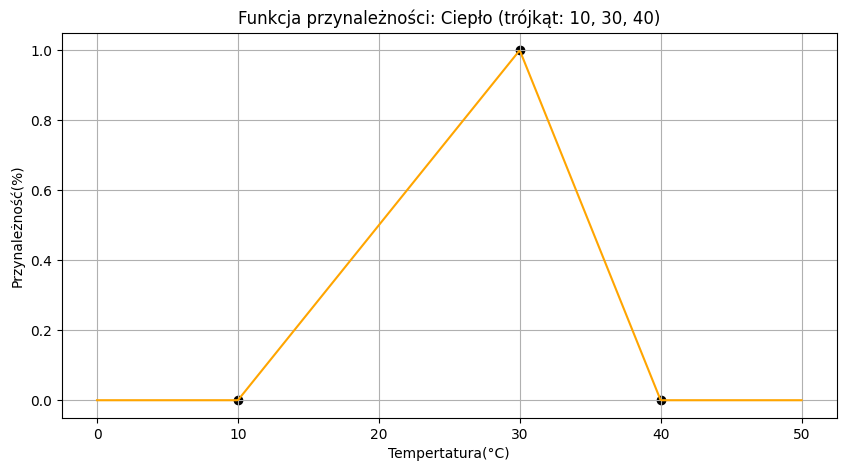

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 50, 500)

def fuzzy_warm(x):
  left_slope = (x - 10) / 20
  right_slope = (40 - x) / 10
  triangle = np.minimum(left_slope, right_slope)
  return np.maximum(triangle, 0)

mu_warm = fuzzy_warm(x)

points_x = [10,30,40]
points_y = fuzzy_warm(np.array(points_x))

plt.figure(figsize=(10,5))
plt.plot(x, mu_warm, color='orange')
plt.scatter(points_x,points_y, color='black')

plt.title('Funkcja przynależności: Ciepło (trójkąt: 10, 30, 40)')
plt.xlabel('Tempertatura(°C)')
plt.ylabel('Przynależność(%)')
plt.grid()

plt.show()

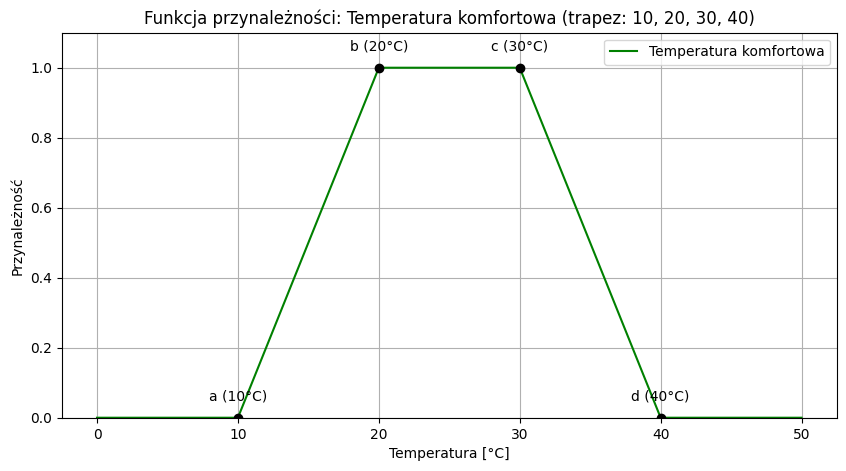

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 50, 500)

# Funkcja trapezowa
def fuzzy_comfort(x):
    return np.maximum(np.minimum(np.minimum((x - 10)/(20 - 10 ), 1), (40 - x)/(40 - 30)), 0)

mu_comfort = fuzzy_comfort(x)

# Punkty charakterystyczne
points_x = [10, 20, 30, 40]
points_y = fuzzy_comfort(np.array(points_x))
labels = ['a (10°C)', 'b (20°C)', 'c (30°C)', 'd (40°C)']

# Rysowanie wykresu
plt.figure(figsize=(10, 5))
plt.plot(x, mu_comfort, label='Temperatura komfortowa', color='green')
plt.scatter(points_x, points_y, color='black', zorder=5)

# Etykiety
for i, label in enumerate(labels):
    plt.annotate(label, (points_x[i], points_y[i] + 0.05), ha='center')

plt.title('Funkcja przynależności: Temperatura komfortowa (trapez: 10, 20, 30, 40)')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Przynależność')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

In [ ]:
def membership_trapezoid(x, a=10, b=20, c=30, d=40):
    """
    Trapezowa funkcja przynależności (fuzzy membership):
    a - start (0)
    b - wejście na plateau (1)
    c - wyjście z plateau (1)
    d - koniec (0)
    """
    # 1) Lewa rampa: rośnie od 0 do 1 na odcinku [a, b]
    rising = (x - a) / (b - a)

    # 2) Prawa rampa: spada od 1 do 0 na odcinku [c, d]
    falling = (d - x) / (d - c)

    # 3) Składamy trapez: w każdym punkcie bierzemy "bardziej ograniczającą" wartość
    mu = np.minimum(rising, falling)

    # 4) Przycinamy wynik do [0, 1]:
    #    - poniżej 0 -> 0 (poza trapezem)
    #    - powyżej 1 -> 1 (na dachu)
    mu = np.clip(mu, 0, 1)

    return mu